<a href="https://colab.research.google.com/github/Tejav202/IETE_SUMMER_INTERNSHIP_2025/blob/main/Deep_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
!pip install reviews

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 43.7 MB/s eta 0:00:00
  Attempting uninstall: markdown-it-py
    Found existing installation: markdown-it-py 3.0.0
    Uninstalling markdown-it-py-3.0.0:
      Successfully uninstalled markdown-it-py-3.0.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
 

In [4]:
df=pd.read_csv("/content/sentiment_data.csv")

In [5]:
df.head()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1.0
1,1,nz retailers don’t even contactless credit car...,0.0
2,2,forever acknowledge channel help lessons ideas...,2.0
3,3,whenever go place doesn’t take apple pay doesn...,0.0
4,4,apple pay convenient secure easy use used kore...,2.0


In [6]:
df.tail()

,Unnamed: 0,Comment,Sentiment
65423,66200,miss,0.0
65424,66201,need code,1.0
65425,66202,im afraid comments mps expenses hopelessly tou...,0.0
65426,66203,understand anything said,1.0
65427,66204,good lord set every little detail every single...,NaN


In [7]:
df.describe()

,Unnamed: 0,Sentiment
count,65428.000000,65427.000000
mean,33267.646314,1.161187
std,19161.127080,0.789030
min,0.000000,0.000000
25%,16399.750000,1.000000
50%,33490.500000,1.000000
75%,49847.250000,2.000000
max,66204.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65428 entries, 0 to 65427
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  65428 non-null  int64  
 1   Comment     65310 non-null  object 
 2   Sentiment   65427 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
print(df.dtypes)

Unnamed: 0      int64
Comment        object
Sentiment     float64
dtype: object


In [10]:
print(df.isnull().sum())

Unnamed: 0      0
Comment       118
Sentiment       1
dtype: int64


In [11]:

df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mean())


In [12]:
df = df.dropna(subset=['Comment', 'Sentiment'])


In [13]:
print(df.isnull().sum())

Unnamed: 0    0
Comment       0
Sentiment     0
dtype: int64


In [14]:
df.drop_duplicates()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1.000000
1,1,nz retailers don’t even contactless credit car...,0.000000
2,2,forever acknowledge channel help lessons ideas...,2.000000
3,3,whenever go place doesn’t take apple pay doesn...,0.000000
4,4,apple pay convenient secure easy use used kore...,2.000000
...,...,...,...
65423,66200,miss,0.000000
65424,66201,need code,1.000000
65425,66202,im afraid comments mps expenses hopelessly tou...,0.000000
65426,66203,understand anything said,1.000000


In [15]:
len(df)

65310

In [16]:
import pandas as pd

# Load the CSV
sentiment_df = pd.read_csv("sentiment_data.csv")

# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Filter and display top 5 positive sentiment comments (Sentiment = 2)
top_positive = sentiment_df_clean[sentiment_df_clean['Sentiment'] == 2].head(5)
print(top_positive[['Comment', 'Sentiment']])


                                              Comment  Sentiment
2   forever acknowledge channel help lessons ideas...        2.0
4   apple pay convenient secure easy use used kore...        2.0
6     got apple pay south africa it’s widely accepted        2.0
8   united states abundance retailers accept apple...        2.0
10  wow really went town psu test rack thats serio...        2.0


In [17]:
# Drop rows with missing comments first
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by Sentiment (lowest = negative)
top_five_negative = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)
print(top_five_negative[['Comment', 'Sentiment']])


                                                 Comment  Sentiment
22276     anotha day work lookin forward hate closin fri        0.0
22270                          kind bugs house dont know        0.0
22269  bored need people rsmv jagex doesnt let u say ...        0.0
22267                                surgery effin hurts        0.0
22266                  im going sadly maybe next year eh        0.0


In [18]:
# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by lowest sentiment value (0 = Negative)
least_five = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)

# Show the results
print(least_five[['Comment', 'Sentiment']])


                                                 Comment  Sentiment
22276     anotha day work lookin forward hate closin fri        0.0
22270                          kind bugs house dont know        0.0
22269  bored need people rsmv jagex doesnt let u say ...        0.0
22267                                surgery effin hurts        0.0
22266                  im going sadly maybe next year eh        0.0


In [19]:
# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by Sentiment in ascending order (0 = most negative)
least_five = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)

# Show the results
print(least_five[['Comment', 'Sentiment']])


                                                 Comment  Sentiment
22276     anotha day work lookin forward hate closin fri        0.0
22270                          kind bugs house dont know        0.0
22269  bored need people rsmv jagex doesnt let u say ...        0.0
22267                                surgery effin hurts        0.0
22266                  im going sadly maybe next year eh        0.0


In [20]:
average_sentiment = sentiment_df['Sentiment'].mean()
print("Average Sentiment Score:", average_sentiment)


Average Sentiment Score: 1.1477086834733894


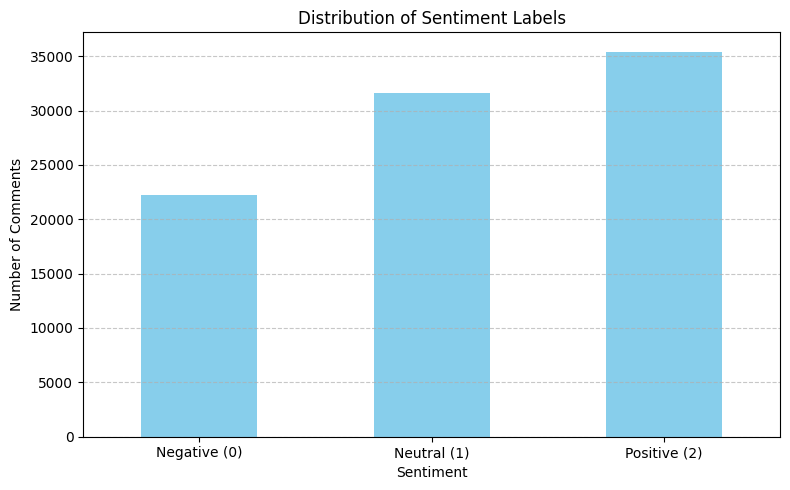

In [21]:
import matplotlib.pyplot as plt

# Count each sentiment class
sentiment_counts = sentiment_df['Sentiment'].value_counts().sort_index()

# Plot as bar chart
sentiment_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title("Distribution of Sentiment Labels")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
average_sentiment = sentiment_df['Sentiment'].mean()
print("Average Sentiment Score:", average_sentiment)


Average Sentiment Score: 1.1477086834733894


In [ ]:
import matplotlib.pyplot as plt

# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Calculate average sentiment (though all sentiments are 0,1,2, the mean = label itself)
avg_sentiment = sentiment_df_clean.groupby('Sentiment').size()

# Plot the count of comments per sentiment
avg_sentiment.plot(kind='bar', figsize=(8,5), color='purple')

# Labeling the chart
plt.xlabel("Sentiment Labels")
plt.ylabel("Number of Comments")
plt.title("COMMENT COUNT PER SENTIMENT")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.yticks(range(0, max(avg_sentiment)+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-4-36007a5e9a00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)


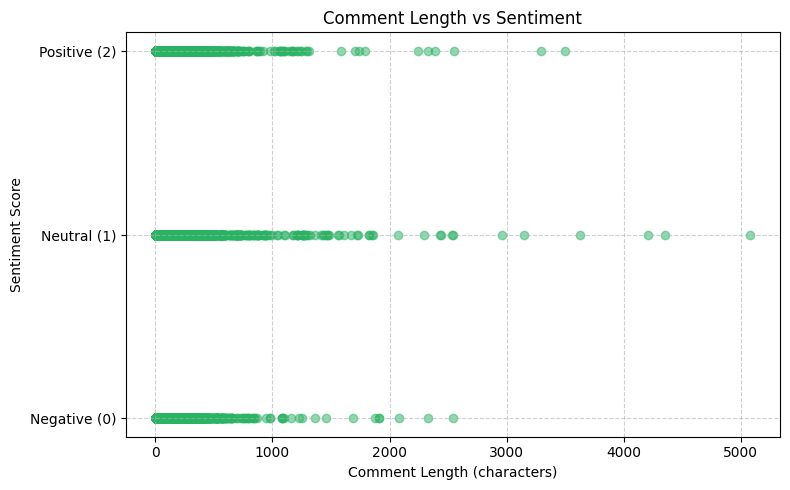

In [ ]:
import matplotlib.pyplot as plt

# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Create a column for comment length
sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)

# Scatter plot: Comment Length vs Sentiment
plt.figure(figsize=(8,5))
plt.scatter(sentiment_df_clean['Comment_Length'], sentiment_df_clean['Sentiment'], color='#28B463', alpha=0.5)
plt.xlabel("Comment Length (characters)")
plt.ylabel("Sentiment Score")
plt.title("Comment Length vs Sentiment")
plt.yticks([0,1,2], ['Negative (0)', 'Neutral (1)', 'Positive (2)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Drop missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Get distribution of sentiment values
sentiment_distribution = sentiment_df_clean['Sentiment'].value_counts().sort_index()
print(sentiment_distribution)


Sentiment
0.0    36848
1.0    53993
2.0    65877
Name: count, dtype: int64


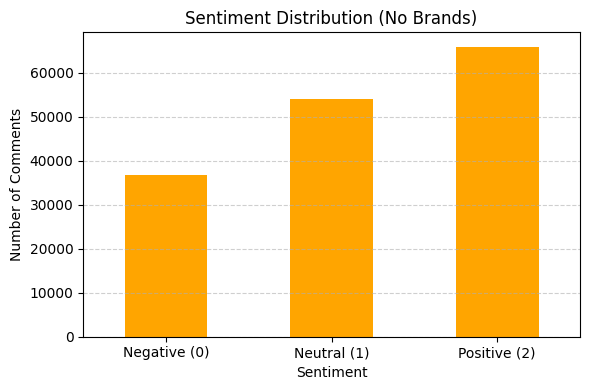

In [ ]:
sentiment_distribution.plot(kind='bar', color='orange', figsize=(6,4))
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.title("Sentiment Distribution (No Brands)")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df['Discount Price']=df['Original Price']-df['Discount']
discount_df=df.groupby('Brands')[['Discount Price','Original Price']].mean()
discount_df=discount_df.reset_index()
discount_df

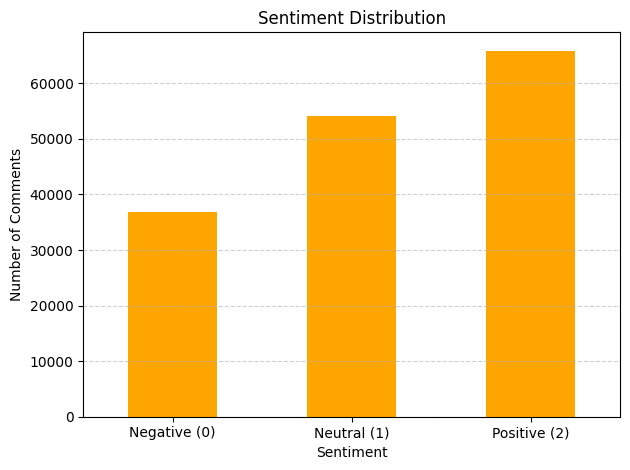

In [ ]:
sentiment_df['Sentiment'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.title("Sentiment Distribution")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Extract all digits mentioned in comments
sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')

# Show a few rows
sentiment_df_clean[['Comment', 'Digit_Count']].head()


<ipython-input-18-7f5db189a422>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')


,Comment,Digit_Count
0,lets forget apple pay required brand new iphon...,0
1,nz retailers don’t even contactless credit car...,0
2,forever acknowledge channel help lessons ideas...,0
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,0


In [ ]:
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Extract all digits mentioned in comments
sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')

# Show a few rows
sentiment_df_clean[['Comment', 'Digit_Count']].head()


<ipython-input-19-7f5db189a422>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')


,Comment,Digit_Count
0,lets forget apple pay required brand new iphon...,0
1,nz retailers don’t even contactless credit car...,0
2,forever acknowledge channel help lessons ideas...,0
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,0


In [ ]:
df.head(5)

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean dataset
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Feature engineering
sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)
sentiment_df_clean['Word_Count'] = sentiment_df_clean['Comment'].apply(lambda x: len(x.split()))
sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')

# Now compute correlation matrix
corr_matrix = sentiment_df_clean[['Sentiment', 'Comment_Length', 'Word_Count', 'Digit_Count']].corr()


<ipython-input-27-c005becf215f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)
<ipython-input-27-c005becf215f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Word_Count'] = sentiment_df_clean['Comment'].apply(lambda x: len(x.split()))
<ipython-input-27-c005becf215f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

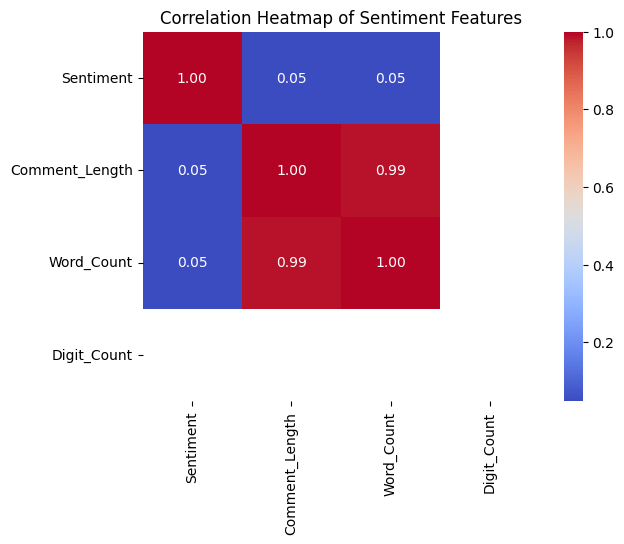

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Sentiment Features")
plt.show()


KeyError: 'Comment_Length'

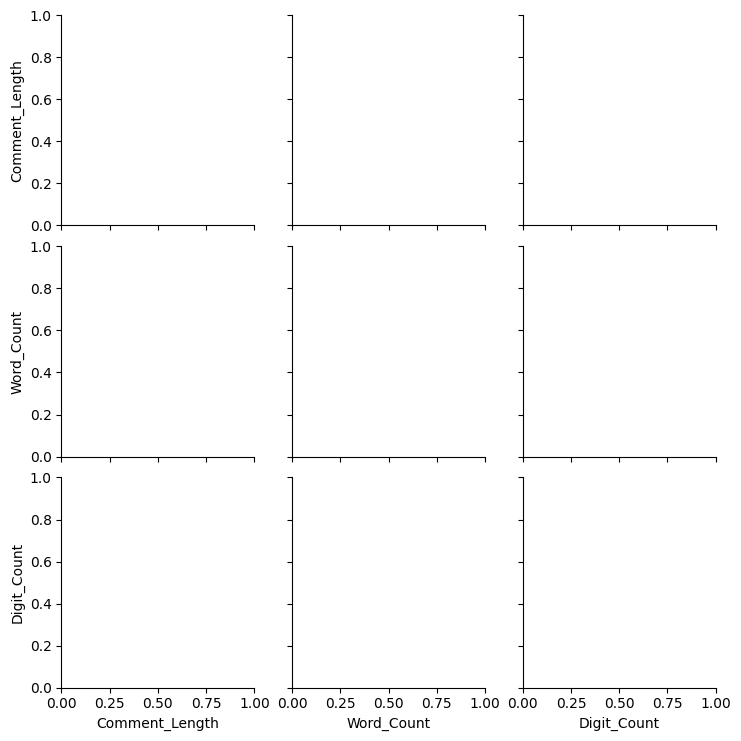

In [ ]:
sns.pairplot(
    sentiment_df_clean,
    vars=['Comment_Length', 'Word_Count', 'Digit_Count'],
    hue='Sentiment',
    palette='coolwarm'
)
plt.suptitle("Feature Relationships by Sentiment", y=1.02)
plt.show()


<ipython-input-6-b22a4422f9c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)


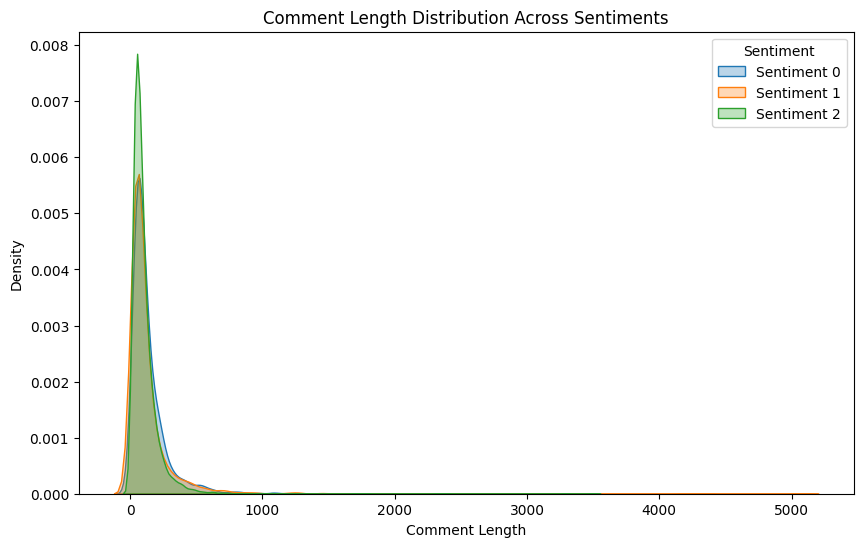

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Feature: Comment Length
sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)

# KDE Plot by Sentiment
plt.figure(figsize=(10, 6))
for sentiment_label in [0, 1, 2]:
    sns.kdeplot(
        data=sentiment_df_clean[sentiment_df_clean['Sentiment'] == sentiment_label],
        x='Comment_Length',
        label=f"Sentiment {sentiment_label}",
        fill=True,
        alpha=0.3
    )

plt.title('Comment Length Distribution Across Sentiments')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
new_df=df.copy()
new_df.head(5)

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1.0
1,1,nz retailers don’t even contactless credit car...,0.0
2,2,forever acknowledge channel help lessons ideas...,2.0
3,3,whenever go place doesn’t take apple pay doesn...,0.0
4,4,apple pay convenient secure easy use used kore...,2.0


In [ ]:
# Example: Factorize unique comments (not typically useful, but valid syntactically)
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])
sentiment_df_clean['Comment_ID'] = pd.factorize(sentiment_df_clean['Comment'])[0]
sentiment_df_clean[['Comment', 'Comment_ID']].head()


<ipython-input-10-d3c66dae6d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Comment_ID'] = pd.factorize(sentiment_df_clean['Comment'])[0]


,Comment,Comment_ID
0,lets forget apple pay required brand new iphon...,0
1,nz retailers don’t even contactless credit car...,1
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,3
4,apple pay convenient secure easy use used kore...,4


In [ ]:
import pandas as pd

# Drop missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Feature creation from comments
sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)
sentiment_df_clean['Word_Count'] = sentiment_df_clean['Comment'].apply(lambda x: len(x.split()))
sentiment_df_clean['Digit_Count'] = sentiment_df_clean['Comment'].str.count(r'\d')

# Define x and y
x = sentiment_df_clean[['Comment_Length', 'Word_Count', 'Digit_Count']]
y = sentiment_df_clean['Sentiment']


<ipython-input-12-06cc00777ba0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Comment_Length'] = sentiment_df_clean['Comment'].apply(len)
<ipython-input-12-06cc00777ba0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_clean['Word_Count'] = sentiment_df_clean['Comment'].apply(lambda x: len(x.split()))
<ipython-input-12-06cc00777ba0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [ ]:
print(new_df.dtypes)

Unnamed: 0      int64
Comment        object
Sentiment     float64
dtype: object


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Remove rows where y_test or y_pred is NaN
mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
mse = mean_squared_error(y_test[mask], y_pred[mask])
print("MSE:", mse)


MSE: 0.5173398157348909


In [ ]:
max(df['Sentiment'])

2.0

In [ ]:
# Binary label: 1 if Positive (Sentiment == 2), else 0
sentiment_df['Positive_Label'] = sentiment_df['Sentiment'].apply(lambda x: 1 if x == 2 else 0)
sentiment_df.head()


,Unnamed: 0,Comment,Sentiment,Positive_Label
0,0,lets forget apple pay required brand new iphon...,1.0,0
1,1,nz retailers don’t even contactless credit car...,0.0,0
2,2,forever acknowledge channel help lessons ideas...,2.0,1
3,3,whenever go place doesn’t take apple pay doesn...,0.0,0
4,4,apple pay convenient secure easy use used kore...,2.0,1


In [ ]:
new_df.head(5)

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1.0
1,1,nz retailers don’t even contactless credit car...,0.0
2,2,forever acknowledge channel help lessons ideas...,2.0
3,3,whenever go place doesn’t take apple pay doesn...,0.0
4,4,apple pay convenient secure easy use used kore...,2.0


In [ ]:
new_df.dtypes

,0
Unnamed: 0,int64
Comment,object
Sentiment,float64


In [ ]:
# Create binary label: 1 if Positive sentiment (2), else 0
y = sentiment_df['Sentiment'].apply(lambda x: 1 if x == 2 else 0)


In [ ]:
from sklearn.model_selection import train_test_split

# Drop missing comments
sentiment_df = sentiment_df.dropna(subset=['Comment'])

# Feature engineering
sentiment_df['Comment_Length'] = sentiment_df['Comment'].apply(len)
sentiment_df['Word_Count'] = sentiment_df['Comment'].apply(lambda x: len(x.split()))
sentiment_df['Digit_Count'] = sentiment_df['Comment'].str.count(r'\d')

# Input features (X) and target (y)
x = sentiment_df[['Comment_Length', 'Word_Count', 'Digit_Count']]
y = sentiment_df['Sentiment']  # or you can binarize: y = sentiment_df['Sentiment'].apply(lambda x: 1 if x == 2 else 0)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Confirm shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (13143, 3)
y_train shape: (13143,)
x_test shape: (3286, 3)
y_test shape: (3286,)


In [ ]:


sentiment_df = sentiment_df.dropna(subset=['Comment', 'Sentiment'])



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load sentiment_data.csv
sentiment_df = pd.read_csv("/content/sentiment_data.csv")

# Drop rows with missing Comment or Sentiment
sentiment_df = sentiment_df.dropna(subset=['Comment', 'Sentiment'])

# Feature engineering from text
sentiment_df['Comment_Length'] = sentiment_df['Comment'].apply(len)
sentiment_df['Word_Count'] = sentiment_df['Comment'].apply(lambda x: len(str(x).split()))
sentiment_df['Digit_Count'] = sentiment_df['Comment'].str.count(r'\d')

# Define features and target
x = sentiment_df[['Comment_Length', 'Word_Count', 'Digit_Count']]
y = sentiment_df['Sentiment']

# Drop rows where y is NaN and ensure alignment
valid_indices = y.dropna().index
x = x.loc[valid_indices]
y = y.loc[valid_indices]

# Final check for NaNs
assert not x.isnull().any().any(), "X still contains NaN!"
assert not y.isnull().any(), "y still contains NaN!"

# Split and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.31      0.02      0.03     11023
           1       0.48      0.59      0.53     16631
           2       0.49      0.65      0.56     20532

    accuracy                           0.48     48186
   macro avg       0.43      0.42      0.37     48186
weighted avg       0.45      0.48      0.43     48186



In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.48497488897190055
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.02      0.03     11023
           1       0.48      0.59      0.53     16631
           2       0.49      0.65      0.56     20532

    accuracy                           0.48     48186
   macro avg       0.43      0.42      0.37     48186
weighted avg       0.45      0.48      0.43     48186



In [ ]:
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {true}")


Streaming output truncated to the last 5000 lines.
Predicted: 2, Actual: 2
Predicted: 2, Actual: 1
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 2, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 2, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 1
Predicted: 1, Actual: 2
Predicted: 2, Actual: 1
Predicted: 2, Actual: 2
Predicted: 1, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 2, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 2
Predicted: 1, Actual: 0
Predicted: 1, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 1, Actual: 0
Predicted: 2, Actual: 0
Predicted: 2, Actual: 2
Predicted: 1,

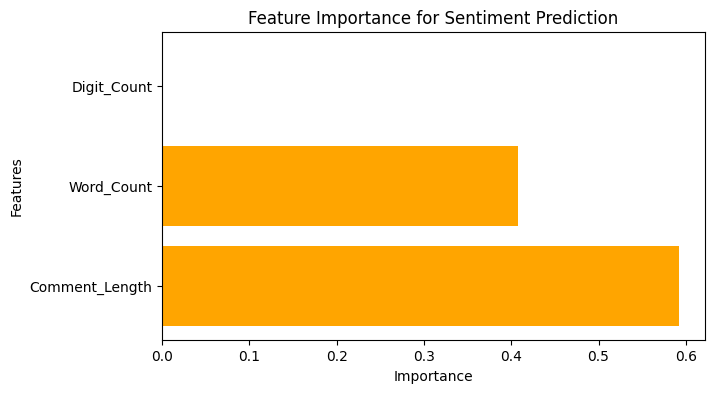

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load and clean data
sentiment_df = pd.read_csv("/content/sentiment_data.csv")
sentiment_df = sentiment_df.dropna(subset=['Comment', 'Sentiment'])

# Feature extraction
sentiment_df['Comment_Length'] = sentiment_df['Comment'].apply(len)
sentiment_df['Word_Count'] = sentiment_df['Comment'].apply(lambda x: len(str(x).split()))
sentiment_df['Digit_Count'] = sentiment_df['Comment'].str.count(r'\d')

# Define features and target
x = sentiment_df[['Comment_Length', 'Word_Count', 'Digit_Count']]
y = sentiment_df['Sentiment']

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

# Feature importance
importance = model.feature_importances_
features = x.columns

# Plot
plt.figure(figsize=(7, 4))
plt.barh(features, importance, color='orange')
plt.title("Feature Importance for Sentiment Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
8870191305

8870191305

In [ ]:
import pandas as pd

df = pd.read_csv('sentiment_data.csv')
df.head()


,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2
